# Real-world Data Wrangling

## Table of Contents
<ul>
<li><a href="#intro">Problem Statement</a></li>
<li><a href="#gather">1. Gather Data</a></li>
<li><a href="#assess">2. Assess Data</a></li>
<li><a href="#clean">3. Clean Data</a></li>
<li><a href="#update">4. Update Data Store</a></li>
<li><a href="#con">5. Conclusions and Reflection</a></li>    
</ul>

In [70]:
#using > /dev/null 2>&1 to suppress output for readability
!python -m pip install kaggle==1.6.12 > /dev/null 2>&1

In [71]:
import requests, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import ast

<a id='intro'></a>
## Problem Statement

In this project, I will be evaluating movies' metadata and keywords from The Movie Database (TMDB), as well as data from Netflix titles. I am particularly interested in looking at how the world of film has changed over the years. To guide my investigation, I have chosen a few research questions:

>1. What are the top keywords associated with popular movies? How has this changed over time?
<br><br> 
>2. What is the overall trend of movie budgets? How do the budgets of movies available on Netflix compare to those not on the platform?

<a id='gather'></a>
## 1. Gather Data

### Dataset 1: The Movies Dataset- Movies Metadata

I chose to use the **Movies Metadata** dataset, as it includes a variety of detailed information on 45,000 movies. I will be able to reference this table to find things like movie titles, budgets, popularity, genres, and more.

As I planned to use only the *Movies Metadata* and *Keywords* datasets from *The Movies Dataset* on Kaggle, I decided to use the **manual download** method of data gathering. This allowed me to easily select the specific files I will use.

>Type: CSV File
>
>Method: The data was gathered using the "Download data manually" method from Kaggle.
>
>Dataset variables (24):
>
>*   adult: Whether the movie is an adult title
>*   belongs_to_collection: List with information about the movie collection, including backdrops and posters
>*   budget: Production budget
>*   genres: List of associated genres
>*   homepage: Website for the movie
>*   id: Unique movie ID
>*   imdb_id: IMDb movie ID
>*   original_language: Original language
>*   original_title: Original title
>*   overview: Movie summary
>*   popularity: A "lifetime" popularity score that is impacted by several attributes
>*   poster_path: Path to the movie poster
>*   production_companies: List of production companies
>*   production_countries: List of production countries
>*   release_date: Release date
>*   revenue: Revenue
>*   runtime: Runtime in minutes
>*   spoken_languages: List of spoken languages
>*   status: Status of movie
>*   tagline: Tagline
>*   title: Title
>*   video: Whether the movie page has a video
>*   vote_average: Average rating
>*   vote_count: Number of voters

In [72]:
#1: Download data manually
movies_metadf = pd.read_csv('data/the-movies-dataset/movies_metadata.csv')
movies_metadf

/tmp/ipykernel_13/4270467076.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadf = pd.read_csv('data/the-movies-dataset/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.00,90.00,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.00,1.00
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.00,360.00,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.00,3.00
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.00,90.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.80,6.00
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.00,87.00,[],Released,NaN,Satan Triumphant,False,0.00,0.00


### Dataset 2: The Movies Dataset- Keywords

I selected the **Keywords** dataset as a supplement to the above, as it contains a list of keywords for each of the listed movies. This table will be helpful in answering my first question-- *What are the top keywords associated with popular movies? How has this changed over time?*

As I planned to use only the *Movies Metadata* and *Keywords* datasets from *The Movies Dataset* on Kaggle, I decided to use the **manual download** method of data gathering. This allowed me to easily select the specific files I will use.
>Type: CSV File
>
>Method: The data was gathered using the "Download data manually" method from Kaggle.
>
>Dataset variables (2):
>
>*   id: Unique movie ID
>*   keywords: List of associated keywords

In [73]:
#Download data manually
keywords_df = pd.read_csv('data/the-movies-dataset/keywords.csv')
keywords_df

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


### Dataset 3: Netflix Movies and TV Shows
Lastly, I chose the **Netflix Movies and TV Shows** dataset, which contains 
listings of all the movies and TV shows available on Netflix, along with related metadata. This dataset will help me identify any relationships between movie characteristics and its existence on the Netflix streaming platform.

I got this dataset via the Kaggle API, as it was the most simple and direct way to gather the data. 

>Type: CSV File
>
>Method: The data was gathered using the "Gather data by accessing APIs" method from Kaggle.
>
>Dataset variables (12):
>
>*   show_id: Unique ID for every movie / TV show
>*   type: Identifier - A movie or TV show
>*   title: Title
>*   director: Director
>*   cast: List of Actors
>*   country: Country of production
>*   date_added: Date it was added on Netflix
>*   release_year: Actual release year
>*   rating: TV Rating
>*   duration: Total Duration - in minutes or number of seasons
>*   listed_in: Genre
>*   description: The summary description

In [74]:
#2: Gather data by accessing APIs
#Download dataset to data folder via kaggle API
!~/.local/bin/kaggle datasets download -d shivamb/netflix-shows -p ./data --unzip

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0%|                                               | 0.00/1.34M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 1.34M/1.34M [00:00<00:00, 138MB/s]


In [75]:
#Load data
netflix_df = pd.read_csv('data/netflix_titles.csv')
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [76]:
#Save raw data locally
movies_metadf.to_csv('data/raw/movies_metadata.csv', index=False, encoding="utf-8")
keywords_df.to_csv('data/raw/keywords.csv', index=False, encoding="utf-8")
netflix_df.to_csv('data/raw/netflix.csv', index=False, encoding="utf-8")

<a id='assess'></a>
## 2. Assess data

Now that the datasets have been loaded in and saved, I can assess according to data quality and tidiness metrics.

### Quality Issue 1: Uniqueness

I began my assessment with the **Movies Metadata** dataset. I decided to first check for any duplicates, as this is a very common data issue.

In [77]:
#Inspecting the dataframe visually
#Looking at only ID column, sorted to make it easier to spot any duplicates
movies_metadf['id'].sort_values()

2429        100
13609     10000
4435      10001
17451    100010
36946    100017
          ...  
25652     99946
3767       9995
12549      9997
25079     99977
13106      9999
Name: id, Length: 45466, dtype: object

In [78]:
#Inspecting the dataframe programmatically
#Finding the number of duplicate rows
movies_metadf.duplicated().sum()

13

In [79]:
#Taking a look at the data stored in duplicate rows
movies_metadf[movies_metadf.duplicated(keep=False)]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
676,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.00,115.00,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.00,1.00
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.00,115.00,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.00,1.00
7345,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.00,105.00,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.90,187.00
8068,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.00,86.00,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.30,15.00
9165,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.00,105.00,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.90,187.00
9327,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.00,86.00,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.30,15.00
13261,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.00,108.00,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.70,3.00
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.00,108.00,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.70,3.00
13603,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,168538,tt0084387,en,Nana,"In Zola's Paris, an ingenue arrives at a tony ...",...,1983-06-13,0.00,92.00,[],Released,NaN,"Nana, the True Key of Pleasure",False,4.70,3.00
14000,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",http://www.daysofdarknessthemovie.com/,18440,tt0499456,en,Days of Darkness,When a comet strikes Earth and kicks up a clou...,...,2007-01-01,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Days of Darkness,False,5.00,5.00


Issue and justification: There is an issue with **Uniqueness** in the Movies Metadata dataset, as there are some duplicate rows.

When visually assessing this dataset, I decided to begin my search with a single column; Narrowing it down this way helped prevent confusion when looking through such a large table. I chose the "id" column, as this should only contain unique values, and sorted the results to make it easier to spot duplicates. To learn more about the uniqueness in this dataset, I used the *.duplicated()* and *.sum()* methods, which gave me a count of duplicate rows. From there, I was able to use a mask on the dataframe to see the data that was repeated.

### Quality Issue 2: Completeness

For this quality issue, I decided to look at the **keywords** dataset.

In [80]:
#Inspecting the dataframe visually
#Taking a look at a sample of 20 rows, using random_state to keep same sample
#    whenever the cell is ran
keywords_df.sample(n=20, random_state=5)

,id,keywords
42583,206397,[]
8510,19742,"[{'id': 1299, 'name': 'monster'}, {'id': 3347,..."
41187,164990,[]
36392,232420,"[{'id': 128, 'name': 'love triangle'}, {'id': ..."
9794,40957,"[{'id': 9927, 'name': 'maine'}, {'id': 14512, ..."
6104,2671,"[{'id': 3297, 'name': 'videoband'}, {'id': 232..."
12748,72163,"[{'id': 163114, 'name': 'gunman'}]"
42200,138611,[]
7945,75046,"[{'id': 290, 'name': 'angel'}]"
9787,167087,[]


In [81]:
#Inspecting the dataframe programmatically
#Created a mask to view only the rows with empty keyword lists, then finding
#    the length (number of rows) to get a count
len(keywords_df[keywords_df['keywords'] == '[]'])

14795

Issue and justification: There is an issue with **Completeness** in the keywords dataset, as there are several rows with empty keyword lists.

First, I inspected the data visually, generating a random sample of rows. I was able to see several rows that contained empty keyword lists, so I decided to dig a little deeper. Using a programmatic approach, I was able to find the exact number of rows containing an empty keyword list, which was 14795 of the original 46419.

### Tidiness Issue 1: "Each type of observational unit forms a table"

I first looked at both the **Movies Metadata** and **Netflix Movies and TV Shows** datasets.

In [82]:
#Inspecting the dataframe visually
movies_metadf.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [83]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [84]:
#Inspecting the dataframe programmatically
print(netflix_df.columns)
movies_metadf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Issue and justification: The issue seen here with these datasets is that **a single observation is spread across multiple tables**.

In viewing both tables, we can see that each row represents a single movie (or TV show). While each table contains some unique attributes, they both have a "title" column, meaning they should ideally be combined. Using the *.columns* attribute on each dataframe, we can see that both include a 'title' column alongside others that describe different aspects of a movie/show.

### Tidiness Issue 2: "Each observation forms a row"

I decided to return to the **keywords** dataset, as there are a couple tidiness issues.

In [85]:
#Inspecting the dataframe visually
keywords_df

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [86]:
#Inspecting the dataframe programmatically
keywords_df['keywords'][0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

Issue and justification: The keywords dataset also has an issue in that **each observation does not have its own row**.

When looking at the table, we can see that the 'keywords' column actually contains a *list* of unique keywords. This breaks one of the rules of data tidiness, as multiple observations are being grouped together and stored in a single cell. Taking a closer look at the first instance, we can see that one row actually contains nine observations.

### Tidiness Issue 3: "Each variable forms a column"

In [87]:
#Inspecting the dataframe visually
keywords_df

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [88]:
#Inspecting the dataframe programmatically
print(type(keywords_df['keywords'][0]))
keywords_df['keywords'][0]

<class 'str'>


"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

Issue and justification: The keywords dataset also has an issue in that **each variable does not have its own column**.

When looking at the table, we can see that the keywords are actually made up of id-keyword pairs. Rather than storing these values as one unit, they should be split into their own respective columns. This is confirmed programmatically, as the data type of the "keywords" column is a string; This does not accurately describe the types of data it contains.

<a id='clean'></a>
## 3. Clean data
The data is now ready to be cleaned, solving the issues above that correspond to data quality and tidiness.

In [89]:
#Make copies of the datasets to ensure the raw dataframes are not impacted
movies_metadf_clean = movies_metadf.copy()
keywords_df_clean = keywords_df.copy()
netflix_df_clean = netflix_df.copy()

### **Quality Issue 1: Uniqueness**

In [90]:
#Using drop_duplicates to get rid of duplicate rows
movies_metadf_clean.drop_duplicates(inplace=True)

In [91]:
#Checking the number of duplicated rows to verify there are none
movies_metadf_clean.duplicated().sum()

0

Justification: To address this issue, I used the *.drop_duplicates* method to remove duplicate rows from the dataset. This was the most efficient method, as it only takes one line of code. I then confirmed with the *.duplicated()* and *.sum()* methods that there were 0 duplicate rows.

### **Quality Issue 2: Completeness**

In [92]:
#Replacing empty lists with NaN, then using dropna to remove those rows
keywords_df_clean.replace('[]', np.nan, inplace=True)
keywords_df_clean.dropna(inplace=True)

In [93]:
#Checking that there are no empty lists
keywords_df_clean[keywords_df_clean['keywords']== '[]'].sum()

id          0
keywords    0
dtype: object

In [94]:
#Checking that there are no null values
keywords_df_clean.isnull().sum()

id          0
keywords    0
dtype: int64

Justification: First, I chose to replace all of the empty keyword lists with NaN, as I knew I could follow with the simple *.dropna()* method to remove those rows. I was then able to verify my work by looking at the sum of empty lists and null values-- which is 0.

### **Tidiness Issue 1: "Each type of observational unit forms a table"**

In [95]:
#Along the title, merging matching rows from Netflix dataframe with all those in Movie Metadata dataframe
movies_df = pd.merge(movies_metadf_clean, netflix_df_clean, how='left', on='title')

In [96]:
#Check that merge was successful
print(movies_df.columns)
movies_df

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'show_id', 'type', 'director', 'cast',
       'country', 'date_added', 'release_year', 'rating', 'duration',
       'listed_in', 'description'],
      dtype='object')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45448,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45449,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45450,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45451,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Justification: To combine these datasets, I decided to use a left merge on the title column. This means that I would keep all rows from the **Movies Metadata** dataframe, and would merge information for matching titles with that in the **Netflix Movies and TV Shows** dataframe. I then checked the resulting columns to confirm that the merge worked.

### **Tidiness Issue 2:  "Each observation forms a row"**

In [97]:
#Turning the keywords column values from String type into List type
keywords_df_clean['keywords'] = keywords_df_clean['keywords'].apply(ast.literal_eval)
#Using .explode() to create a row for each observation
keywords_df_clean = keywords_df_clean.explode('keywords')

In [98]:
#Look at head of table to ensure only one keyword pair per row
keywords_df_clean.head()

,id,keywords
0,862,"{'id': 931, 'name': 'jealousy'}"
0,862,"{'id': 4290, 'name': 'toy'}"
0,862,"{'id': 5202, 'name': 'boy'}"
0,862,"{'id': 6054, 'name': 'friendship'}"
0,862,"{'id': 9713, 'name': 'friends'}"


Justification: In order to move each observation to its own row, I chose to use the *.explode()* method. However, this cannot be performed on Strings, which was the original datatype for the 'keywords' column; I had to first use *.apply(ast.literal_eval)* to ensure that the list contained in this column was represented as a list type. From there, I was able to explode the dataframe along the 'keywords' column. I then confirmed that this worked by viewing the head of the table.

### **Tidiness Issue 3: "Each variable forms a column"**

In [99]:
#Expanding the key-value pairs in 'keywords' column to their own respective columns
df_expanded = keywords_df_clean['keywords'].apply(pd.Series)

In [100]:
#Renaming original 'id' column for clarity
keywords_df_clean.rename(columns={'id': 'movie_id'}, inplace=True)
#Renaming new 'keywords' columns for clarity
df_expanded.rename(columns={'id': 'keyword_id', 'name': "keyword"}, inplace=True)
#Concatinating 'movie_id' with new expanded columns
keywords_df_clean = pd.concat([keywords_df_clean['movie_id'], df_expanded], axis=1)

In [101]:
#Verifying that data is structured correctly
keywords_df_clean.head()

,movie_id,keyword_id,keyword
0,862,931,jealousy
0,862,4290,toy
0,862,5202,boy
0,862,6054,friendship
0,862,9713,friends


Justification: I used the *.apply(pd.Series)* method to expand the key-value pairs in the **keywords** dataframe into their own respective columns. For clarity, I renamed both these new columns as well as the original 'id' column that corresponds to the *movie id*. Finally, I was able to concatinate the original dataframe and the new columns I created. To confirm everything was structured as I intended, I viewed the head of the table.

### **Remove unnecessary variables and combine datasets**

While I have already combined the **Movies Metadata** and **Netflix Movies and TV Shows** dataframes, I now need to remove unnecessary variables and clean up the columns for use.

In [102]:
#Taking a look at the head of the table to see the columns and what they contain
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#Dropping unecessary columns
movies_df.drop(columns=['belongs_to_collection', 'genres','homepage','imdb_id','original_language', 'original_title', 'overview', 'poster_path','production_companies', 'production_countries', 'revenue', 'runtime','spoken_languages', 'tagline', 'video', 'vote_count', 'director', 'cast', 'country', 'release_year', 'duration', 'listed_in', 'description'], inplace=True)

In [104]:
#Dropping tv shows, since my focus is on movies
indices_to_drop = movies_df[movies_df['type'] == 'TV Show'].index
movies_df.drop(indices_to_drop, inplace=True)
movies_df.drop(columns='type', inplace=True)

In [105]:
#Dropping movies without title information
movies_df.dropna(subset='title', inplace=True)

In [106]:
#Updating 'adult' column to reflect TV ratings, then dropping rating column
movies_df.loc[(movies_df['rating'] == 'TV-MA') | (movies_df['rating'] == 'R'), 'adult'] = True
movies_df['adult'] = movies_df['adult'].fillna(False)
movies_df.drop(columns='rating', inplace=True)
movies_df['adult'] = movies_df['adult'].astype(bool)

In [107]:
#Checking datatypes of columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45015 entries, 0 to 45452
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adult         45015 non-null  bool   
 1   budget        45015 non-null  object 
 2   id            45015 non-null  object 
 3   popularity    45015 non-null  object 
 4   release_date  44931 non-null  object 
 5   status        44935 non-null  object 
 6   title         45015 non-null  object 
 7   vote_average  45015 non-null  float64
 8   show_id       2544 non-null   object 
 9   date_added    2544 non-null   object 
dtypes: bool(1), float64(1), object(8)
memory usage: 3.5+ MB


In [108]:
#Fixing datatypes of columns
#Note: I will be modifying the 'date_added' column later, so I don't change that here
movies_df['budget'] = movies_df['budget'].astype(float)
movies_df['id'] = movies_df['id'].astype('Int32')
movies_df['popularity'] = movies_df['popularity'].astype(float)
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format='ISO8601').dt.year.astype('Int32')

#Renaming release_date column since I extracted just the year
movies_df = movies_df.rename(columns={'release_date': 'release_year'})

In [109]:
#Verifying that datatypes are now correct
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45015 entries, 0 to 45452
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adult         45015 non-null  bool   
 1   budget        45015 non-null  float64
 2   id            45015 non-null  Int32  
 3   popularity    45015 non-null  float64
 4   release_year  44931 non-null  Int32  
 5   status        44935 non-null  object 
 6   title         45015 non-null  object 
 7   vote_average  45015 non-null  float64
 8   show_id       2544 non-null   object 
 9   date_added    2544 non-null   object 
dtypes: Int32(2), bool(1), float64(3), object(4)
memory usage: 3.2+ MB


In [110]:
#Changing date_added column to bool type reflecting whether or not the movie is on Netflix
movies_df['date_added'] = movies_df['date_added'].where(movies_df['date_added'].isna(), True)
movies_df['date_added'] = movies_df['date_added'].where(movies_df['date_added'].notna(), False)

#Renaming column
movies_df = movies_df.rename(columns={'date_added': 'on_Netflix'})

In [111]:
#Rename id columns for clarity
movies_df = movies_df.rename(columns={'id': 'TMDb_id', 'show_id': 'Netflix_id'})

In [114]:
#Fill null values in numeric columns with mean
movies_df['budget'] = movies_df['budget'].fillna(movies_df['budget'].mean())
movies_df['popularity'] = movies_df['popularity'].fillna(movies_df['popularity'].mean())
movies_df['vote_average'] = movies_df['vote_average'].fillna(movies_df['vote_average'].mean())

In [115]:
#Disable scientific notation for large numbers (better readability for budget column)
pd.options.display.float_format = '{:.0f}'.format

In [117]:
#Remove movies with no release year information
movies_df = movies_df[movies_df['release_year'].notna()]

In [118]:
#Remove Rumored and Canceled movies
indices_to_drop = movies_df[(movies_df['status'] == 'Rumored') | (movies_df['status'] == 'Canceled')].index
movies_df.drop(indices_to_drop, inplace=True)

In [119]:
#Check out the clean dataframe
movies_df.head()

,adult,budget,TMDb_id,popularity,release_year,status,title,vote_average,Netflix_id,on_Netflix
0,True,30000000,862,22,1995,Released,Toy Story,8,NaN,False
1,True,65000000,8844,17,1995,Released,Jumanji,7,NaN,False
2,True,0,15602,12,1995,Released,Grumpier Old Men,6,NaN,False
3,True,16000000,31357,4,1995,Released,Waiting to Exhale,6,NaN,False
4,True,0,11862,8,1995,Released,Father of the Bride Part II,6,NaN,False


<a id='update'></a>
## 4. Update Data Store
Updating the 'clean' data folder with these new, clean datasets.

In [120]:
#Save clean data locally
movies_metadf_clean.to_csv('data/clean/movies_metadata_clean.csv', index=False, encoding="utf-8")
keywords_df_clean.to_csv('data/clean/keywords_clean.csv', index=False, encoding="utf-8")
netflix_df_clean.to_csv('data/clean/netflix_clean.csv', index=False, encoding="utf-8")
movies_df.to_csv('data/clean/movies_combined.csv', index=False, encoding="utf-8")

<a id='con'></a>
## 5. Conclusions and Reflection

### **5.1:** Define and answer the research questions

Now that the data has been cleaned, I can use visualizations to answer the research questions posed in step 1.

#### *Research question 1:* What are the top keywords associated with popular movies? How has this changed over time?

In [121]:
#Narrow down dataframe to only the most popular movies (99th percentile) and save to new df
popular_movies = movies_df[movies_df['popularity'] > movies_df['popularity'].quantile(0.99)]

#Find keywords associated with popular movie IDs
popular_kw = keywords_df_clean.loc[keywords_df_clean['movie_id'].isin(popular_movies['TMDb_id'])]
#Get count of each unique keyword and keep only the most popular
popular_kw = popular_kw.drop(columns={'movie_id', 'keyword_id'})
popular_kw_counts = popular_kw.value_counts()[popular_kw.value_counts() > popular_kw.value_counts().quantile(0.99)]
popular_kw_counts.index = popular_kw_counts.index.get_level_values('keyword')

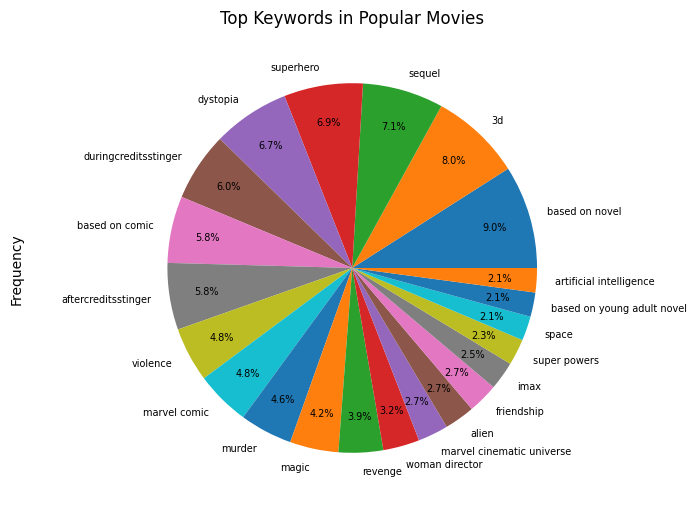

In [122]:
#Visual 1 - Pie Chart showing the frequency of the top keywords in popular movies
plot1 = popular_kw_counts.plot.pie(y='count', autopct='%.1f%%', figsize=(6, 6), 
                                   textprops={'fontsize':7}, pctdistance=0.8)
plot1.set_title('Top Keywords in Popular Movies', pad=10);
plot1.set_ylabel('Frequency', labelpad=70);

**What are the top keywords associated with popular movies?** 

We can see all of the top keywords from popular movies in this Pie Chart. The top five are 'based on novel', '3d', 'sequel', 'superhero', and 'dystopia'. This definitely tracks with the types of movies I hear about most often, and I find it really interesting to see this breakdown.

In [123]:
#Fixing float format to display with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [124]:
#Find most popular movies from each decade

#Add decade column to new dataframe
popular_bydecade = movies_df.copy()
popular_bydecade['decade'] = (popular_bydecade['release_year'] // 10) * 10

#Keep only the most popular movies from each decade (99th percentile)
quantile_thresholds = popular_bydecade.groupby('decade')['popularity'].transform('quantile', 0.99)
popular_bydecade = popular_bydecade[popular_bydecade['popularity'] > quantile_thresholds]

In [125]:
#Look at observation count for each decade
popular_bydecade.groupby('decade').count()

,adult,budget,TMDb_id,popularity,release_year,status,title,vote_average,Netflix_id,on_Netflix
decade,,,,,,,,,,
1870,1,1,1,1,1,1,1,1,0,1
1880,1,1,1,1,1,1,1,1,0,1
1890,1,1,1,1,1,1,1,1,0,1
1900,1,1,1,1,1,1,1,1,0,1
1910,2,2,2,2,2,2,2,2,0,2
1920,5,5,5,5,5,5,5,5,1,5
1930,13,13,13,13,13,13,13,13,1,13
1940,15,15,15,15,15,15,15,15,0,15
1950,21,21,21,21,21,21,21,21,0,21


Note: Since there is not much data to look at prior to the 1930s, these rows will be dropped and excluded from analysis

In [126]:
#Find indeces of rows with a decade prior to 1930s
rows_to_drop = popular_bydecade[popular_bydecade['decade'] < 1930].index
#Drop these rows
popular_bydecade = popular_bydecade.drop(rows_to_drop)

In [127]:
#Merging the release year of most popular movies with the keywords dataframe
keyword_trend = pd.merge(popular_bydecade[['release_year', 'TMDb_id']].rename(columns={'TMDb_id': 'movie_id'}), keywords_df_clean, how='left')

#Creating new column for decade and dropping year column
keyword_trend['decade'] = (keyword_trend['release_year'] // 10) * 10
keyword_trend = keyword_trend.drop(columns='release_year')

#Finding value counts and keeping only the top 5 for each decade
keyword_trend = keyword_trend.groupby('decade')['keyword'].value_counts().to_frame().reset_index()
keyword_trend = keyword_trend.groupby('decade').apply(lambda x: x.nlargest(5, 'count'), include_groups=False)
keyword_trend = keyword_trend.reset_index().drop(columns='level_1')

In [128]:
#Normalize the count of each keyword **by decade**
s = keyword_trend.groupby('decade')['count'].sum()
keyword_trend['count'] = keyword_trend['count'].astype(float)

for x in range(len(keyword_trend)):
    keyword_trend.loc[x, 'count'] = keyword_trend.loc[x, 'count'] / s.iloc[(keyword_trend.index/5).astype(int)].reset_index(drop=True).iloc[x]

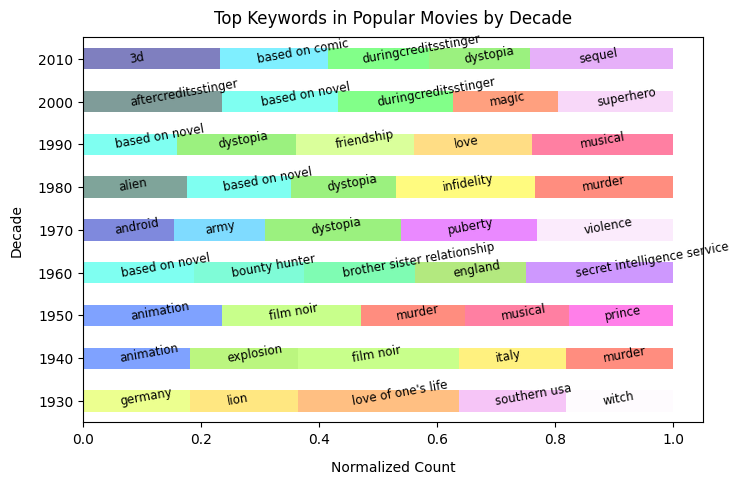

In [129]:
#Create a pivot table based on the release year, only including starts of decades
kw_trend_pivot = keyword_trend.pivot_table(index='decade', columns='keyword', values='count', aggfunc='sum')
plot2 = kw_trend_pivot.plot.barh(stacked=True, figsize=(8,5), legend=False, colormap='gist_ncar', alpha=0.5);

#Get legend labels from columns
legend_labels = kw_trend_pivot.columns

#Iterate through the containers in this plot
for i, container in enumerate(plot2.containers):
    
    # Get the label for the current container from the legend labels
    label = legend_labels[i]

    # Iterate through the individual bar segments and apply legend label with a bit of custom
        # positioning
    for bar in container:
        # Make sure to only annotate visible bar segments (those with width larger than 0)
        if bar.get_width() > 0:
            x_pos = bar.get_x() + bar.get_width() / 3
            y_pos = bar.get_y() + bar.get_height() / 3
            plot2.annotate(label, xy=(x_pos, y_pos), fontsize=8.5, rotation=10)
            
#Fix labels and add title
plot2.set_ylabel('Decade', labelpad=10);
plot2.set_xlabel('Normalized Count', labelpad=10);
plot2.set_title('Top Keywords in Popular Movies by Decade', pad=10);

**How has this changed over time?** 

The chart above shows the top 5 most popular keywords for the most popular movies of each decade. They are as follows:

* 1930s: 'germany', 'lion', 'love of one's life', 'southern usa', and 'witch'
* 1940s: 'animation', 'explosion', 'film noir', 'italy', and 'murder'
* 1950s: 'animation', 'film noir', 'murder', 'musical', and 'prince'
* 1960s: 'based on novel', 'bounty hunter', 'brother sister relationship', 'england', and 'secret intelligence service'
* 1970s: 'android', 'army', 'dystopia', 'puberty', and 'violence'
* 1980s: 'alien', 'based on novel', 'dystopia', 'infidelity', and 'murder'
* 1990s: 'based on novel', 'dystopia', 'friendship', 'love', and 'musical'
* 2000s: 'aftercreditsstinger', 'based on novel', 'duringcreditsstinger', 'magic', and 'superhero'
* 2010s: '3d', 'based on comic', 'duringcreditstinger', 'dystopia', and 'sequel'

It's interesting to see how these keywords change throughout the decades, especially in regards to historical events. For example, 'animation' is a top keyword from the 40s and 50s, which lines up with the 'Golden Age' of American animation. It was in 1937 that *Snow White and the Seven Dwarfs* was released, widely considered the first full-length animated movie, and was followed by many more Disney classics. Another notable trend has to do with the rise of the Marvel Cinematic Universe in the late 2000s-early 2010s. In these decades we see keywords like 'based on comic', 'superhero', and 'duringcreditstinger'-- the latter of which was popularized by their use in Marvel movies.

#### *Research question 2:* What is the overall trend of movie budgets? How do the budgets of movies available on Netflix compare to those not on the platform?

In [130]:
#Create new dataframe to work with, containing only budget and release year information
budget_info = movies_df[['budget', 'release_year', 'on_Netflix']].copy()

#Create column for decade
budget_info['decade'] = (budget_info['release_year'] // 10) * 10
budget_info = budget_info.drop(columns='release_year')

#Find average budget for each decade and overwrite dataframe with result
    # (only including decades with non-zero budgets)
budget_trend = budget_info.groupby('decade')['budget'].mean().to_frame()
budget_trend = budget_trend[budget_trend['budget']>0]

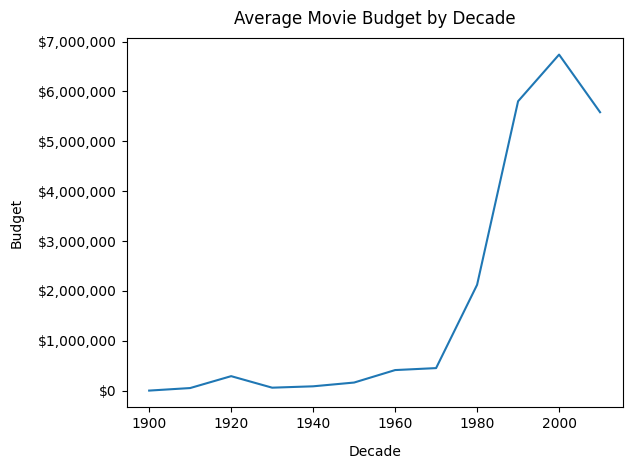

In [131]:
#Create plot to show average budget across decades
plot3 = budget_trend.plot.line(legend=False)
plot3.ticklabel_format(style='plain', axis='y')
plot3.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

#Fix labels and add title
plot3.set_ylabel('Budget', labelpad=10);
plot3.set_xlabel('Decade', labelpad=10);
plot3.set_title('Average Movie Budget by Decade', pad=10);

**What is the overall trend of movie budgets?**

As seen in the line graph above, movie budgets have seen exponential growth across the decades. The first surge is seen at the 70s into the 80s, which is during the 'Golden Age' of blockbuster films. It appears that large-budget movies continued to rise in popularity through the 90s, 00s, and 2010s.

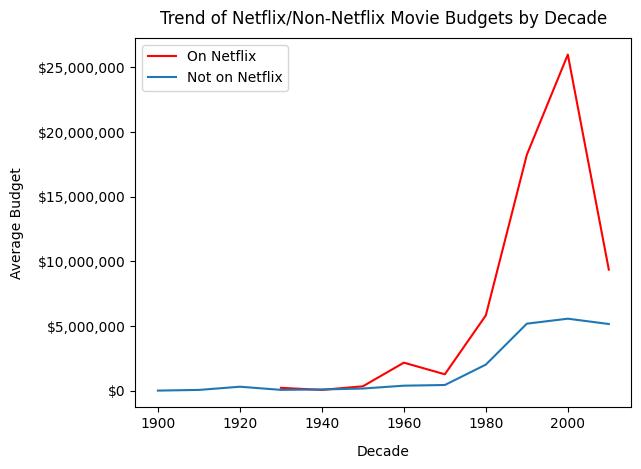

In [132]:
#Creating a second chart to show comparison of budget for movies on Netflix vs not on Netflix

#Separate Netflix movies from non-Netflix movies
budget_netflix = budget_info[budget_info['on_Netflix']].groupby('decade')['budget'].mean()
budget_notnetflix = budget_info[budget_info['on_Netflix'] == False].groupby('decade')['budget'].mean()

#Keep only movies with non-zero budgets
budget_netflix = budget_netflix[budget_netflix>0]
budget_notnetflix = budget_notnetflix[budget_notnetflix>0]

#Create plot with two lines
plot4 = budget_netflix.plot.line(label="On Netflix", color='red')
budget_notnetflix.plot.line(label="Not on Netflix")

#Format the plot
plot4.ticklabel_format(style='plain', axis='y')
plot4.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plot4.set_title('Trend of Netflix/Non-Netflix Movie Budgets by Decade', pad=10);
plot4.set_xlabel('Decade', labelpad=10);
plot4.set_ylabel('Average Budget', labelpad=10);
plot4.legend();

**How do the budgets of movies available on Netflix compare to those not on the platform?**

To find out a little bit more about the trends seen with movie budgets, I decided to plot movies on Netflix as well as those not on Netflix. It is very obvious that those available on Netflix tend to have much larger production budgets-- This is perhaps because higher-budget movies are more popular, and thus more likely to be scooped up by streaming services.

### **5.2:** Reflection

If I had more time to complete this project, there are a number of things I would like to focus on. Firstly, I would dive deeper into the rows in the **Movies Metadata** table that are missing values. I'm curious as to whether these rows are actual errors, or if they are simply missing information that can be supplemented by IMDb or another source. 

One thing I wanted to explore but couldn't because it was too tricky and time consuming is the relationship between movies and current events. I think it would be very interesting to look at the keywords from top movies and compare them with those from Google Trends or news headlines. If I were to return to this project in the future, I would investigate this research question further.